# Before beginning - Change Runtime!
```
    French:
        Exécution -> Modifier le type d'exécution
        Accélérateur matériel : None -> GPU
```
```
    English:
        Runtime -> change runtime type
        Hardware accelerator : None -> GPU
```

# Introduction

`Generative Adversarial Networks` is a composite neural network with two parts, a `generator` and a `discriminator`, **competing against each other**.
>
Basically, the generator is trained to fool the discriminator into classifying fake generated images as real by creating images that look as similar as possible to real images.
>
Meanwhile the discriminator tries to determine if an image is fake (created by the generator) or real (from dataset).
If the generator fails to fool the discriminator, then its weights are strongly modified.
>
Otherwise, the generator stays relatively similar.
>
The discriminator is trained separatly with real and fake samples.


---
Practical Work Steps: (Praqueticaleux worqueux staipssss)
  1.   Real samples
  2.   Latent Space  - (to complete)
  3.   Fake samples  - (to complete)
  4.   Discriminator - (to complete)
  5.   Generator     - (to complete)
  6.   GAN Construction
  7.   Train         - (to complete)
  8.   Have Fun


# To Compile on start



## Imports

In [ ]:
import numpy as np

from numpy import *

from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2DTranspose
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Input
from matplotlib import pyplot as plt
import math

## Load real samples

In [ ]:
# load and prepare mnist training images
def load_real_samples():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	img_dim = X.shape[1]*X.shape[2]
	return X, img_dim

## Miscelaneous


In [ ]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i].reshape((28,28)), cmap='gray_r')
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

In [ ]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

In [ ]:
def test_generate(nbSamples=25):
  # plot
  fig = plt.figure(figsize=(8,8))
  axes = []

  # generate image
  vector = generate_latent_points(100, nbSamples)
  X = g_model.predict(vector)
  
  
  for i in range(25):
      # generates subplot for each image
      img = X[i].reshape((28,28))
      axes.append(fig.add_subplot(math.ceil(np.sqrt(nbSamples)),math.ceil(np.sqrt(nbSamples)),i+1) )
      plt.imshow(img, cmap='gray_r')
      plt.axis('off')

  fig.tight_layout()    
  plt.show()

# TP

## Data Generation

In order to train our models, we need data for the discriminator to identify as real or fake. Therefore we generate both real and fake samples and label them accordingly.
>
---
`Real samples`
>The real samples correspond to `n_samples` samples randomly selected from the “dataset” given. They are then labelled as “real” (as an array of ones). The function we use: `generate_real_samples()` takes this “dataset” and the number of samples “n_samples” as inputs and returns `X` and `y`, corresponding respectively to the real samples and their labels.

`Fake samples`
>We also need fake samples in order to train the Discriminator Network. For this we use images generated by the Generator. However instead of labelling them as “fake”, we label them as “real” in order to induce an error during the training of the GAN network.
>
>The function we use: `generate_fake_samples()` takes the generator model `g_model`, the latent space `latent_dim` and the number of samples `n_samples` as inputs. It then generates fake samples from random points of the latent space, labels them as real and them returns `X` and `y`, corresponding respectively to these generated samples and their labels.

### Real samples



In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
 
	# retrieve selected images
	X = dataset[ix]

	# TODO
	img_dim = X.shape[1]*X.shape[2]

	X = X.reshape((n_samples, img_dim))
 
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

# Latent space

We observe data (in our instance: digital images) in `pixel space`. Since we use images that are $28x28$ pixels with one integer between 0 and 1 representing the grayscale value of each pixel. This means we have $784$ values in our data.


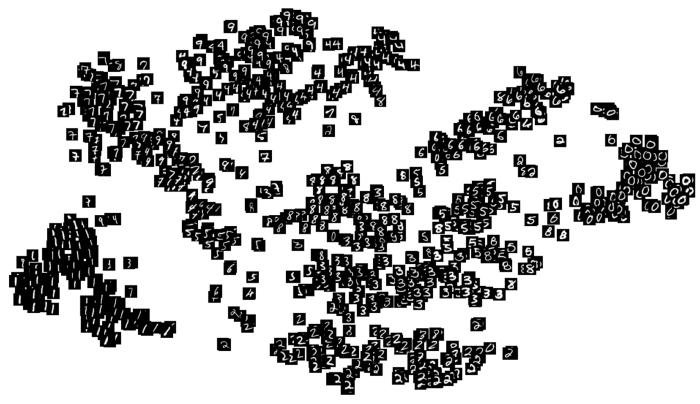

Source : https://towardsdatascience.com/understanding-latent-space-in-machine-learning-de5a7c687d8d

We would like to map this data into another, less high resolution, dimension. For instance, we could try and map this data to a one-dimensional vector with 100 values each of those being between 0 and 1.
>
Indeed, in `pixel space`, two of the same digits (let’s take “1” as an example (one the left of the above image)), can be quite far away, but our objective is to have these to digits being mapped so that they end up closer together.
>
This means the `latent space` captures the different features and structure of the data and can abstractly represent $28x28$ images of “1”’s as near points in a $100$ dimensional space.

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = []
	# reshape into a batch of inputs for the network
	x_input = x_input
	return x_input

### Fake Samples

In [ ]:
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = None
	# predict outputs
	X = None
	# create 'fake' class labels (0)
	y = None
	return X, y

## Discriminator

The discriminator network in a Generative model is charged with identifying real existing samples from the training dataset and distinguish them from fake data, generated by the Generator Network.
>
---
In order to do this, it has to learn based on the error generated when wrongly identifying data. It is, however, very easy to overfit this model. Indeed, when no `Dropout` layers are used, it is very easy to get a Discriminator that identifies everything correctly, therefore not generating errors and thus not training the Generator Network : the model is **overfitting**.
>
Indeed, the Generator network is trained based on the Discriminator loss, thus if this loss is very small too fast, the Generator doesn’t get any time to learn.
>`Dropout` layers are layers that randomly drop a certain percentage of neurons during training in order to fight overfitting.  
>
When designing this network, make sure not to forget to only have **one output**, this output being a number between 0 and 1, corresponding to whether the data is identified respectively as “fake” or “real”.
>
Also, having activation functions with vanishing gradient (such as Relu) is a very big problem for this network, as it allows neurons to die which, in our case, we do not want at all, we should use `LeakyReLU` instead.
>
---
`LeakyReLU`
\begin{cases}\alpha x&{\text{if }}x<0\\x&{\text{if }}x\geq 0\end{cases}

>A LeakyReLU is like a normal ReLU, except that there is a small non-zero output for negative input values.
The input to the generator is a series of randomly generated numbers called **latent sample**. Once trained, the generator can produce digit images from latent samples
>
PS: It takes a latent sample ($n$ randomly generated numbers) and produces $784$ data points which can be reshaped into a $28 x 28$ digit image which is the size used by all MNIST digit images.

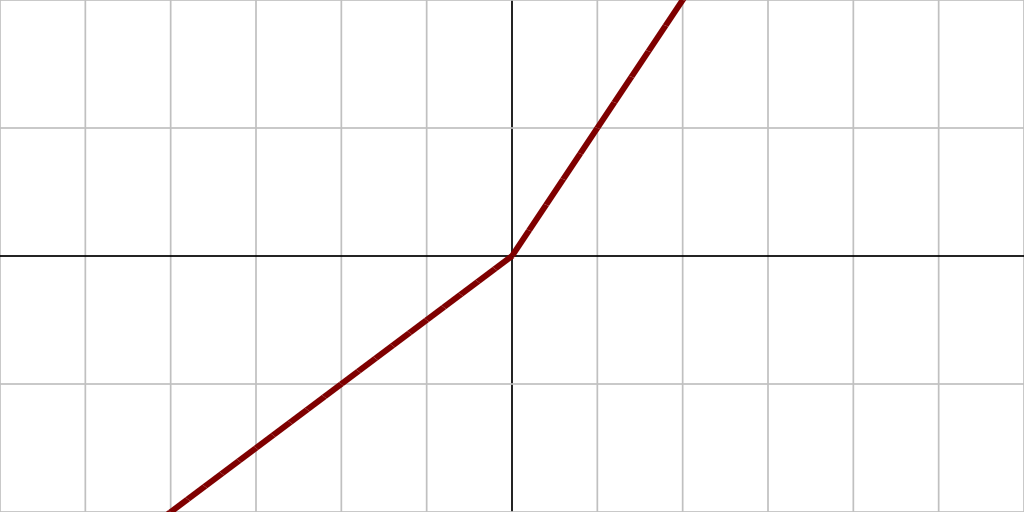

In [ ]:
def define_discriminator(input_dim):
		"""
		@params:
			input_dim : output of generator -> img_width * img_height
		"""
		model = Sequential()
		
		# TODO: define model

		# TODO: define last layer and its activation function
		
		# compile model
		model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
		return model

## Generator

Here we'll build the generator network. To make this network a universal function approximator, we'll need at least one hidden layer. We should use a `LeakyReLU` to allow gradients to flow backwards through the layer unimpeded.

In [ ]:
# define the standalone generator model
def define_generator(input_dim, output_dim):
		"""
		@params:
			input_dim : lantent space dimension
			output_dim : img_width * img_height
		"""
		model = Sequential()
	
		# TODO: define model

		# TODO: find last layer and its activation function

		model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
		return model

## GAN


In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	#TODO
	# connect them

 	# compile model
	model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
	return model

## Train



Training the composite model involves generating a batch worth of points in the latent space via the `generate_latent_points()` function in the previous section. We first update the discriminator model with real and fake samples, then update the generator via the composite model.
>
---
>
There is one catch in this process of training the generator via the GAN:
>*We do not want the discriminator’s weights to be affected because we are using the discriminator as merely a classifier.*
Here are the steps to follow:
>
1. Train the discriminator with the real MNIST digit images and the images generated by the generator to classify the real and fake images.
2. Train the generator as part of the GAN. We feed latent samples into the GAN and let the generator to produce digit images and use the discriminator to classify the image.



In [ ]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            #TODO
            X_real, y_real = None, None

            # generate 'fake' examples
            #TODO
            X_fake, y_fake = None, None

            # create training set for the discriminator
            X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))

            # update discriminator model weights
            d_loss, _ = d_model.train_on_batch(X, y)

            # prepare points in latent space as input for the generator
            #TODO
            X_gan = None

            # create inverted labels for the fake samples
            #TODO
            y_gan = None

            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)

            # summarize loss on this batch
            print('\r>%d, %d/%d, d=%.6f, g=%.6f' % (i+1, j+1, bat_per_epo, d_loss, g_loss), end='')
            # evaluate the model performance, sometimes
        print()
        if (i+1) % 10 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [ ]:
# load image data
dataset, img_dim = load_real_samples()
print(dataset.shape, img_dim)

(60000, 28, 28, 1) 784


In [ ]:
# size of the latent space
latent_dim = 100

In [ ]:
# create the discriminator
d_model = define_discriminator(img_dim)

# create the generator
g_model = define_generator(latent_dim, img_dim)

# create the gan
gan_model = define_gan(g_model, d_model)

In [ ]:
# train model
train(g_model, d_model, gan_model, dataset, latent_dim,n_epochs = 40)

>1, 234/234, d=0.580858, g=0.725518
>2, 234/234, d=0.574609, g=0.772955
>3, 234/234, d=0.604786, g=0.814599
>4, 234/234, d=0.620970, g=0.792312
>5, 234/234, d=0.679645, g=0.799989


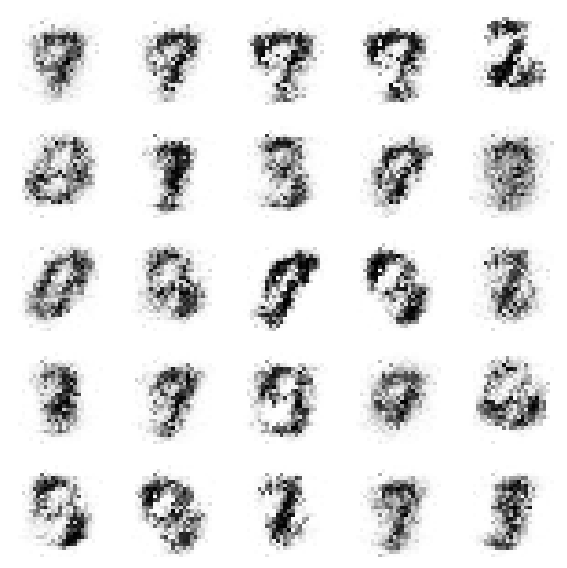

In [ ]:
test_generate()